<a href="https://colab.research.google.com/github/AriadnaVazquez/Metodos-Numericos-I/blob/main/Polinomio%20Osculante%20de%20Hermite%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de Hermite:
3*x**5/4 - 7*x**4/4 - 11*x**3/4 + 31*x**2/4 - 3*x + 1


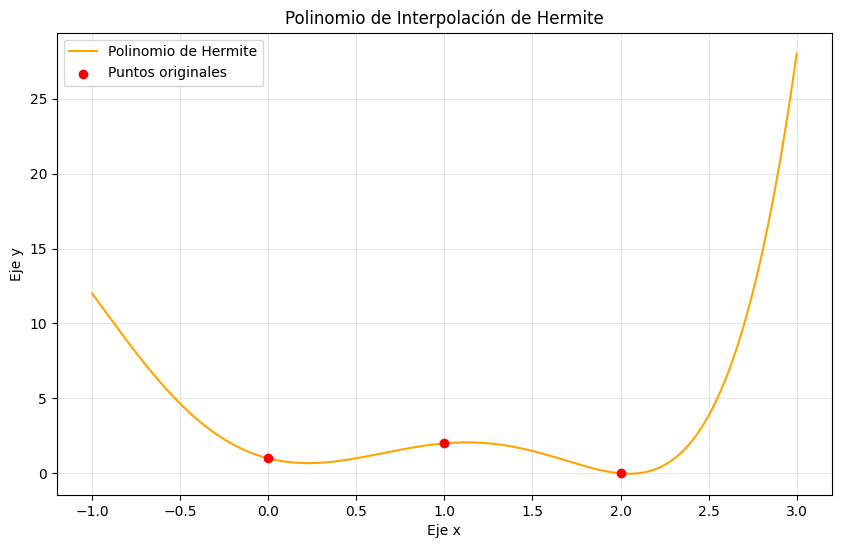

In [6]:
# Importamos las librerías necesarias
import sympy as sp  # Para cálculos simbólicos
import matplotlib.pyplot as plt  # Para graficar
import numpy as np  # Para manejar arreglos numéricos

# Paso 1: Definir una función que calcule el polinomio de Hermite
def hermite_interpolation_simple(x_data, y_data, dy_data=None):
    """
    Calcula el polinomio de interpolación de Hermite.

    Parámetros:
        x_data: Lista de valores x (las coordenadas x de los puntos).
        y_data: Lista de valores y (las coordenadas y de los puntos).
        dy_data: Lista con las derivadas en cada x (puede ser None).

    Retorna:
        El polinomio de Hermite como una expresión simbólica de SymPy.
    """
    # Usaremos una variable simbólica x para el polinomio
    x = sp.symbols('x')

    # Si no se proporcionan derivadas, asumimos que son todas cero
    if dy_data is None:
        dy_data = [0] * len(x_data)

    # Inicializamos el polinomio de Hermite en cero
    H = 0

    # Construimos el polinomio de Hermite
    for i in range(len(x_data)):
        # Parte base del polinomio de Lagrange para el punto i
        L_i = 1
        for j in range(len(x_data)):
            if i != j:
                L_i *= (x - x_data[j]) / (x_data[i] - x_data[j])

        # Agregar el término de interpolación para el valor y (función)
        H += y_data[i] * (L_i ** 2)

        # Agregar el término de interpolación para la derivada
        H += dy_data[i] * (L_i ** 2) * (x - x_data[i])

    # Simplificamos el polinomio
    H = sp.simplify(H)

    # Retornamos el polinomio
    return H

# Paso 2: Función para graficar el polinomio y los puntos
def graficar_hermite(x_data, y_data, hermite_poly):
    """
    Dibuja la gráfica del polinomio de Hermite junto con los puntos originales.

    Parámetros:
        x_data: Lista de valores x de los datos.
        y_data: Lista de valores y de los datos.
        hermite_poly: Polinomio de Hermite como expresión de SymPy.
    """
    # Convertir el polinomio de SymPy a una función usable con Numpy
    hermite_func = sp.lambdify(sp.symbols('x'), hermite_poly, modules=['numpy'])

    # Crear valores x para la gráfica
    x_vals = np.linspace(min(x_data) - 1, max(x_data) + 1, 500)
    y_vals = hermite_func(x_vals)

    # Hacer la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Polinomio de Hermite', color='orange')  # Polinomio
    plt.scatter(x_data, y_data, color='red', label='Puntos originales', zorder=5)  # Puntos
    plt.title('Polinomio de Interpolación de Hermite')
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Paso 3: Probar el código con un ejemplo sencillo
# Ejemplo de datos
x_data = [0, 1, 2]
y_data = [1, 2, 0]
dy_data = [0, 1, -1]  # Derivadas

# Calcular el polinomio de Hermite
hermite_poly = hermite_interpolation_simple(x_data, y_data, dy_data)
print("Polinomio de Hermite:")
print(hermite_poly)

# Graficar el polinomio y los puntos
graficar_hermite(x_data, y_data, hermite_poly)